In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
# %timeit sirve para evaluar el tiempo de ejecucion
df_avisos_detalle = pd.read_csv('../csv/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')

# Porcentajes de Avisos por nivel agrupados por Carga Horaria

A continuación se realizara un análisis de los avisos agrupandolos por Nivel requerido y la carga horaria solicitada para cada uno.

In [3]:
avisos_x_nivel_y_carga = df_avisos_detalle.groupby(['tipo_de_trabajo', 'nivel_laboral']).size().unstack(fill_value=0)
avisos_x_nivel_y_carga

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
tipo_de_trabajo,,,,,
Fines de Semana,0,0,1,3,10
Full-time,179,745,1777,751,8887
Part-time,1,7,350,132,373
Pasantia,0,0,49,10,4
Por Contrato,0,5,10,5,17
Por Horas,0,1,8,15,39
Primer empleo,0,0,2,1,0
Teletrabajo,1,50,1,1,57
Temporario,0,1,18,3,20


Como se puede observar hay una diferencia importante entre las solicitudes para trabajo Full-time con respecto al resto. A fin de poder evaluar como es la distribución de Cargas solicitadas con respecto a cada nivel solicitado, lo que se hará es calcular el porcentaje para cada 

In [4]:
avisos_nivel_tipo_carga = avisos_x_nivel_y_carga.apply(lambda x: 100 * x / float(x.sum())).round(3)
avisos_nivel_tipo_carga

nivel_laboral,Gerencia / Alta Gerencia / Dirección,Jefe / Supervisor / Responsable,Junior,Otro,Senior / Semi-Senior
tipo_de_trabajo,,,,,
Fines de Semana,0.000,0.000,0.045,0.326,0.106
Full-time,98.895,92.089,80.190,81.542,94.472
Part-time,0.552,0.865,15.794,14.332,3.965
Pasantia,0.000,0.000,2.211,1.086,0.043
Por Contrato,0.000,0.618,0.451,0.543,0.181
Por Horas,0.000,0.124,0.361,1.629,0.415
Primer empleo,0.000,0.000,0.090,0.109,0.000
Teletrabajo,0.552,6.180,0.045,0.109,0.606
Temporario,0.000,0.124,0.812,0.326,0.213


[Text(0.5,0,'Gerencia / Alta Gerencia / Dirección'),
 Text(1.5,0,'Jefe / Supervisor / Responsable'),
 Text(2.5,0,'Junior'),
 Text(3.5,0,'Otro'),
 Text(4.5,0,'Senior / Semi-Senior')]

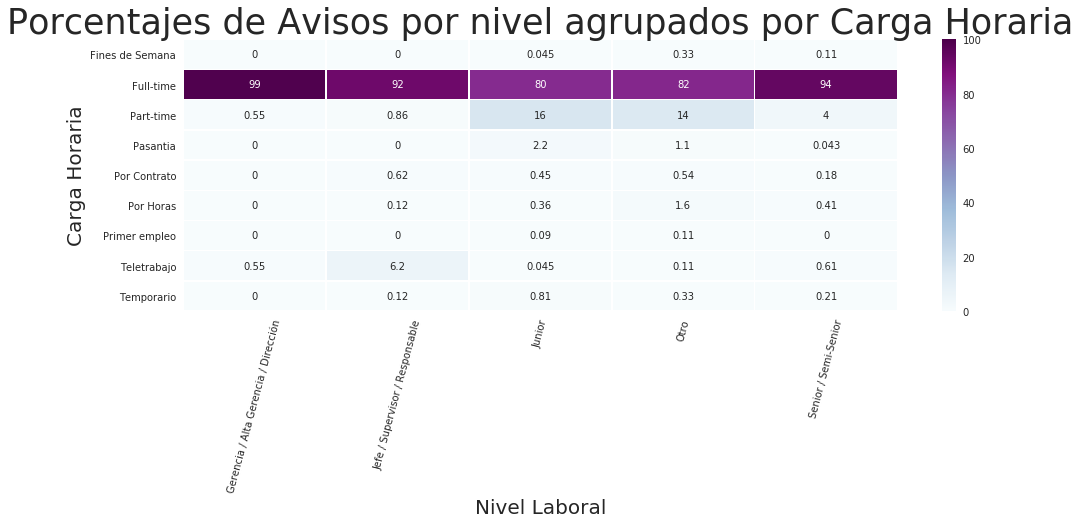

In [5]:
plt.figure(figsize = (16,5))
avisos_heatMap = sns.heatmap(avisos_nivel_tipo_carga,vmin=0,vmax=100, cmap='BuPu', linewidths=0.5, annot=True)
avisos_heatMap.set_ylabel("Carga Horaria", fontsize = 20)
avisos_heatMap.set_xlabel("Nivel Laboral", fontsize = 20)
avisos_heatMap.set_title("Porcentajes de Avisos por nivel agrupados por Carga Horaria", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = avisos_nivel_tipo_carga.columns.values, rotation=75)

## Conclusión
Se puede observar que predomina los trabajos con dedicación Full-time, aunque en el caso de los cargos de nivel menor, existe una mayor variación.

# Porcentajes de Avisos por carga horaria, agrupados por nivel
En este caso, evaluaremos a partir de los mismos datos, pero revisando como se distribuyen dentro de una misma carga horaria los niveles solicitados

In [6]:
avisos_x_carga_y_nivel = df_avisos_detalle.groupby(['nivel_laboral','tipo_de_trabajo']).size().unstack(fill_value=0)
avisos_x_carga_y_nivel

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nivel_laboral,,,,,,,,,
Gerencia / Alta Gerencia / Dirección,0,179,1,0,0,0,0,1,0
Jefe / Supervisor / Responsable,0,745,7,0,5,1,0,50,1
Junior,1,1777,350,49,10,8,2,1,18
Otro,3,751,132,10,5,15,1,1,3
Senior / Semi-Senior,10,8887,373,4,17,39,0,57,20


In [7]:
avisos_nivel_carga_tipo = avisos_x_carga_y_nivel.apply(lambda x: 100 * x / float(x.sum())).round(3)
avisos_nivel_carga_tipo

tipo_de_trabajo,Fines de Semana,Full-time,Part-time,Pasantia,Por Contrato,Por Horas,Primer empleo,Teletrabajo,Temporario
nivel_laboral,,,,,,,,,
Gerencia / Alta Gerencia / Dirección,0.000,1.451,0.116,0.000,0.000,0.000,0.000,0.909,0.000
Jefe / Supervisor / Responsable,0.000,6.038,0.811,0.000,13.514,1.587,0.000,45.455,2.381
Junior,7.143,14.401,40.556,77.778,27.027,12.698,66.667,0.909,42.857
Otro,21.429,6.086,15.295,15.873,13.514,23.810,33.333,0.909,7.143
Senior / Semi-Senior,71.429,72.024,43.221,6.349,45.946,61.905,0.000,51.818,47.619


In [8]:
plt.figure(figsize = (16,5))
avisos_heatMap = sns.heatmap(avisos_nivel_carga_tipo,vmin=0,vmax=100, cmap='YlGnBu

SyntaxError: EOL while scanning string literal (<ipython-input-8-9f542bee6295>, line 2)

In [ ]:
', linewidths=0.5, annot=True)
avisos_heatMap.set_xlabel("Carga Horaria", fontsize = 20)
avisos_heatMap.set_ylabel("Nivel Laboral", fontsize = 20)
avisos_heatMap.set_title("Porcentajes de Avisos por carga horaria, agrupados por nivel", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = avisos_nivel_carga_tipo.columns.values, rotation=75)

## Conclusion
Aquí se observa como para todos los tipos de contratación, como de acuerdo al mayor la exigencia de la carga, aumenta el nivel laboral solicitado.

# Avisos publicados por Areas y Nivel

Para analizar este punto, se observan muchas areas que cuentan con pocos pedidos. 
Se filtraran primero para aquellas Areas, donde la cantidad de publicaciones supere a la media, obteniendo asi una muestra que nos permite observar la distribución por Area y el nivel que se solicita para cada una

In [ ]:
cant_x_area = df_avisos_detalle.groupby('nombre_area').size().reset_index(name='counts')
filtro_area_mayor_mean = cant_x_area[cant_x_area["counts"] > cant_x_area["counts"].mean()]
aux = pd.merge(df_avisos_detalle,filtro_area_mayor_mean,on="nombre_area",how="inner")
cant_x_nivel = aux.groupby(['nombre_area','nivel_laboral']).size().unstack(fill_value=0).transpose()
cant_x_nivel

In [ ]:
plt.figure(figsize = (30,3))
avisos_heatMap = sns.heatmap(cant_x_nivel, cmap='Greens', linewidths=0.5)
avisos_heatMap.set_ylabel("Nivel", fontsize = 20)
avisos_heatMap.set_xlabel("Area", fontsize = 20)
avisos_heatMap.set_title("Avisos publicados por Areas y Nivel", fontsize = 35)
avisos_heatMap.set_xticklabels(labels = cant_x_nivel.columns.values, rotation=75)

## Conclusión
En este caso, se puede observar una distribucion mas pareja, asi como tamabien aquellas areas donde aumenta la exigencia en el nivel. 
La Diferencia entre las distintas áreas se muestra similar, salvo en el caso de las Ventas, donde se solicita un nivel mucho mayo que en el resto.